importing the Dependencies

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [79]:
# loading the dataset to a Panda DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [78]:
#first five rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [80]:
# last 5 rows of the dataset
credit_card_data.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [81]:

#dataset information
credit_card_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [82]:
#checking the nnumber of mising values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [83]:
# distribution of legit transaction and fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset id highly unbalanced


0--> Normal Transaction and 
1--> Fraudulent Transaction

In [84]:
# seperating the data for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [85]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [86]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [87]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [88]:
# compare the values for both transactions 
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transaction and fraudulent transaction

number of fraudulent : 492

In [107]:
legit_sample= legit.sample(n=492)

Concatenating two DataFrames

In [108]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [109]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
269632,163703.0,-0.608489,0.919681,2.276029,-0.470488,0.066413,-0.096987,0.627229,-0.070309,-0.073664,...,-0.143463,-0.050423,-0.336927,0.060625,0.341242,-0.700280,0.195989,-0.085958,1.00,0
23016,32545.0,1.193089,-0.233935,0.564766,-0.211253,-0.680872,-0.270400,-0.485049,0.201288,0.353571,...,-0.070551,-0.266166,0.129661,0.027866,-0.035542,0.922087,-0.067848,-0.007152,3.76,0
218597,141380.0,1.939792,-0.439924,-0.346610,0.308468,-0.493952,0.112241,-0.733897,0.156435,1.142491,...,0.246189,0.909016,0.142786,0.797656,-0.101379,-0.270205,0.035257,-0.038276,9.99,0
87531,61726.0,-0.989156,1.455641,1.505999,0.572128,0.248961,0.469607,0.207271,0.484965,-0.918114,...,-0.088470,-0.344180,-0.182859,-0.770177,0.232039,-0.422187,-0.134994,0.011682,5.00,0
168933,119445.0,1.597904,-1.838978,-0.990235,-0.810033,-0.509253,1.230893,-0.894694,0.380474,0.208146,...,-0.006523,-0.405402,0.351345,-0.388800,-0.785249,-0.527231,0.010645,-0.010227,236.59,0


In [110]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [111]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [112]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94382.737805,0.137085,-0.056661,-0.117347,0.082577,0.174086,-0.018714,0.013641,-0.005982,-0.032363,...,0.005380,0.025962,-0.027146,-0.056033,-0.034719,-0.013203,0.017279,0.002370,-0.027552,88.732480
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into features & targets

In [113]:
X =new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [114]:
print(X)


            Time        V1        V2        V3        V4        V5        V6  \
269632  163703.0 -0.608489  0.919681  2.276029 -0.470488  0.066413 -0.096987   
23016    32545.0  1.193089 -0.233935  0.564766 -0.211253 -0.680872 -0.270400   
218597  141380.0  1.939792 -0.439924 -0.346610  0.308468 -0.493952  0.112241   
87531    61726.0 -0.989156  1.455641  1.505999  0.572128  0.248961  0.469607   
168933  119445.0  1.597904 -1.838978 -0.990235 -0.810033 -0.509253  1.230893   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [115]:
print(Y)

269632    0
23016     0
218597    0
87531     0
168933    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into training data and testing data

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [117]:
print(X.shape,X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [122]:
model=LogisticRegression()

In [123]:
#training the logistic regression model with training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Model Evaluation

Accuracy Score

In [124]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [125]:
print('Accuracy on  training data : ', training_data_accuracy)


Accuracy on  training data :  0.9466327827191868


In [126]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [127]:
print('Accuracy on testing data : ', test_data_accuracy)

Accuracy on testing data :  0.8934010152284264


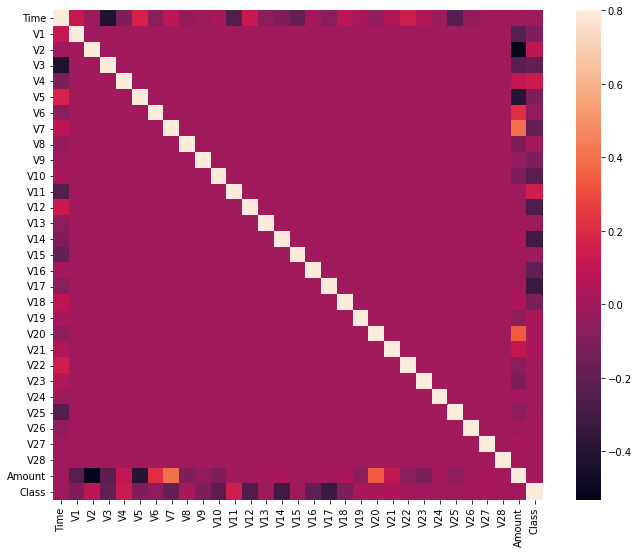

In [128]:
corrmat = credit_card_data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square = True)
plt.show()

Random Forest 

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)


In [131]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
yPred = rfc.predict(X_test) 


In [132]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (yPred != Y_test).sum()
print("The model used is Random Forest classifier")
acc = accuracy_score(Y_test, yPred)
print("The accuracy is {}".format(acc))
prec = precision_score(Y_test, yPred)
print("The precision is {}".format(prec))
rec = recall_score(Y_test, yPred)
print("The recall is {}".format(rec))
f1 = f1_score(Y_test, yPred)
print("The F1-Score is {}".format(f1))
MCC = matthews_corrcoef(Y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC)) 


The model used is Random Forest classifier
The accuracy is 0.9137055837563451
The precision is 0.9655172413793104
The recall is 0.8571428571428571
The F1-Score is 0.908108108108108
The Matthews correlation coefficient is0.8325226416700762


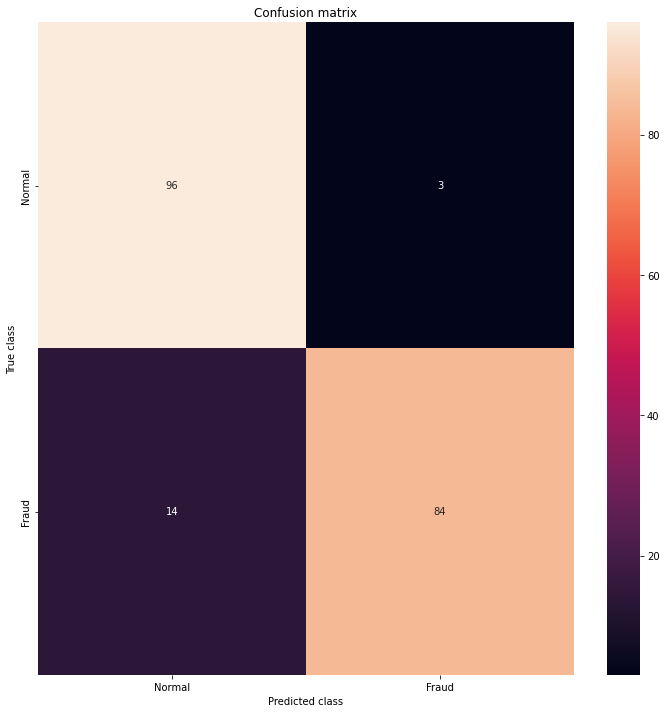

In [133]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()